### Importing Libraries

In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import tensorboard as tb
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor
from Environments.car_racing import CarRacing
from Environments.car_racing_modification import carRacingGrayscale, carRacingHSVSaturation, carRacingGreen, carRacingFramestack, carRacingResized

C:\Users\User\.conda\envs\mle_tf\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\User\.conda\envs\mle_tf\lib\site-packages\ale_py\roms\__init__.py:89: DeprecationWarning: Automatic importing of atari-py roms won't be supported in future releases of ale-py. Please migrate over to using `ale-import-roms` OR an ALE-supported ROM package. To make this warning disappear you can run `ale-import-roms --import-from-pkg atari_py.atari_roms`.For more information see: https://github.com/mgbellemare/Arcade-Learning-Environment#rom-management
  ROMS = resolve_roms()


### Colour Space Conversion Results

In [2]:
ppo_base_1 = pd.read_csv("Evaluation/PPO_Base/PPO_1/eval_rew_mean.csv")
ppo_base_1.drop(columns="Unnamed: 0", inplace=True)
ppo_base_2 = pd.read_csv("Evaluation/PPO_Base/PPO_2/eval_rew_mean.csv")
ppo_base_2.drop(columns="Unnamed: 0", inplace=True)
ppo_base_3 = pd.read_csv("Evaluation/PPO_Base/PPO_3/eval_rew_mean.csv")
ppo_base_3.drop(columns="Unnamed: 0", inplace=True)

ppo_grayscale_1 = pd.read_csv("Evaluation/PPO_Grayscale/PPO_1/eval_rew_mean.csv")
ppo_grayscale_1.drop(columns="Unnamed: 0", inplace=True)
ppo_grayscale_2 = pd.read_csv("Evaluation/PPO_Grayscale/PPO_2/eval_rew_mean.csv")
ppo_grayscale_2.drop(columns="Unnamed: 0", inplace=True)
ppo_grayscale_3 = pd.read_csv("Evaluation/PPO_Grayscale/PPO_3/eval_rew_mean.csv")
ppo_grayscale_3.drop(columns="Unnamed: 0", inplace=True)

ppo_hsvsaturation_1 = pd.read_csv("Evaluation/PPO_HSVSaturation/PPO_1/eval_rew_mean.csv")
ppo_hsvsaturation_1.drop(columns="Unnamed: 0", inplace=True)
ppo_hsvsaturation_2 = pd.read_csv("Evaluation/PPO_HSVSaturation/PPO_2/eval_rew_mean.csv")
ppo_hsvsaturation_2.drop(columns="Unnamed: 0", inplace=True)
ppo_hsvsaturation_3 = pd.read_csv("Evaluation/PPO_HSVSaturation/PPO_3/eval_rew_mean.csv")
ppo_hsvsaturation_3.drop(columns="Unnamed: 0", inplace=True)

ppo_green_1 = pd.read_csv("Evaluation/PPO_Green/PPO_1/eval_rew_mean.csv")
ppo_green_1.drop(columns="Unnamed: 0", inplace=True)
ppo_green_2 = pd.read_csv("Evaluation/PPO_Green/PPO_2/eval_rew_mean.csv")
ppo_green_2.drop(columns="Unnamed: 0", inplace=True)
ppo_green_3 = pd.read_csv("Evaluation/PPO_Green/PPO_3/eval_rew_mean.csv")
ppo_green_3.drop(columns="Unnamed: 0", inplace=True)

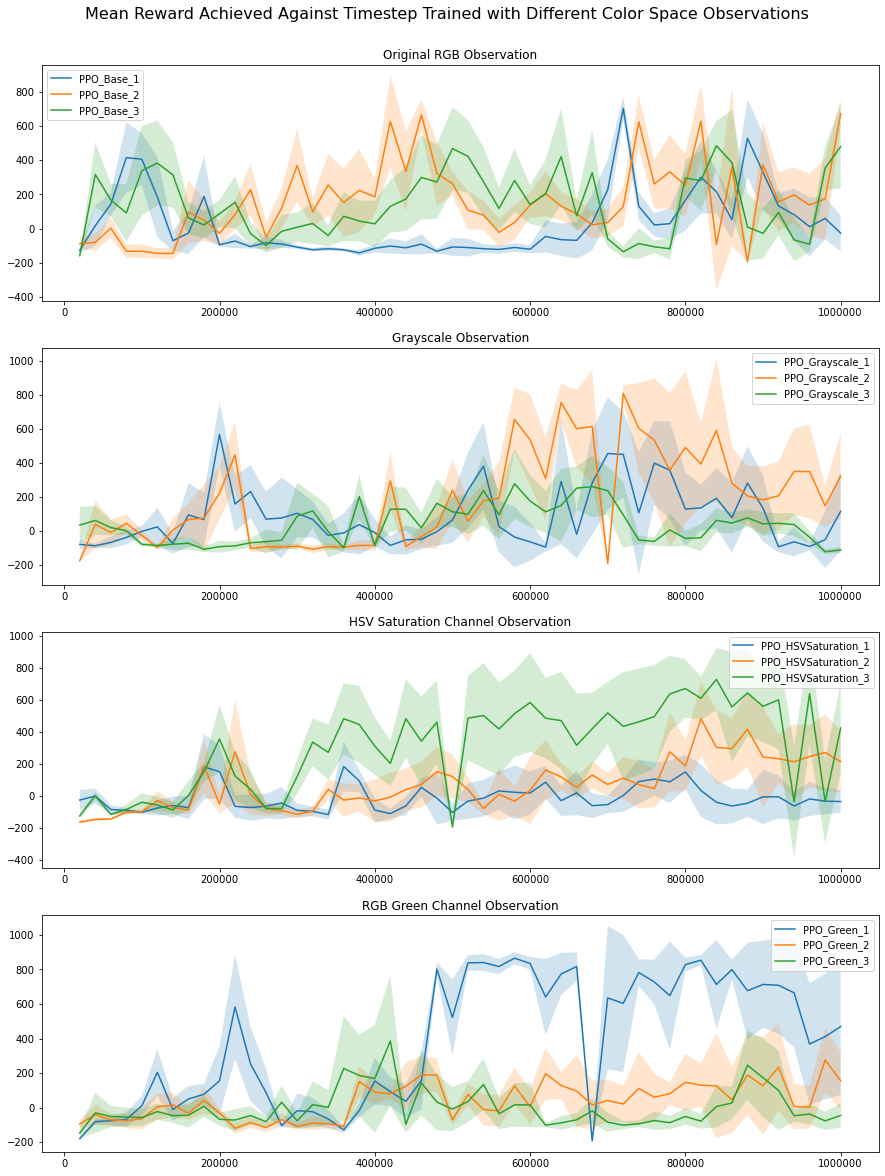

In [3]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1)
fig.set_figheight(20)
fig.set_figwidth(15)
fig.suptitle('Mean Reward Achieved Against Timestep Trained with Different Color Space Observations', fontsize=16, y=0.92)

line1, = ax1.plot(ppo_base_1['Step'], ppo_base_1['Value'])
line2, = ax1.plot(ppo_base_2['Step'], ppo_base_2['Value'])
line3, = ax1.plot(ppo_base_3['Step'], ppo_base_3['Value'])
ax1.fill_between(ppo_base_1['Step'], ppo_base_1['Value'] - ppo_base_1['Std'],  ppo_base_1['Value'] + ppo_base_1['Std'], alpha=0.2)
ax1.fill_between(ppo_base_2['Step'], ppo_base_2['Value'] - ppo_base_2['Std'],  ppo_base_2['Value'] + ppo_base_2['Std'], alpha=0.2)
ax1.fill_between(ppo_base_3['Step'], ppo_base_3['Value'] - ppo_base_3['Std'],  ppo_base_3['Value'] + ppo_base_3['Std'], alpha=0.2)
ax1.ticklabel_format(style='plain')
ax1.legend([line1, line2, line3], ['PPO_Base_1', 'PPO_Base_2', 'PPO_Base_3'])
ax1.title.set_text("Original RGB Observation")

line1, = ax2.plot(ppo_grayscale_1['Step'], ppo_grayscale_1['Value'])
line2, = ax2.plot(ppo_grayscale_2['Step'], ppo_grayscale_2['Value'])
line3, = ax2.plot(ppo_grayscale_3['Step'], ppo_grayscale_3['Value'])
ax2.fill_between(ppo_grayscale_1['Step'], ppo_grayscale_1['Value'] - ppo_grayscale_1['Std'],  ppo_grayscale_1['Value'] + ppo_grayscale_1['Std'], alpha=0.2)
ax2.fill_between(ppo_grayscale_2['Step'], ppo_grayscale_2['Value'] - ppo_grayscale_2['Std'],  ppo_grayscale_2['Value'] + ppo_grayscale_2['Std'], alpha=0.2)
ax2.fill_between(ppo_grayscale_3['Step'], ppo_grayscale_3['Value'] - ppo_grayscale_3['Std'],  ppo_grayscale_3['Value'] + ppo_grayscale_3['Std'], alpha=0.2)
ax2.ticklabel_format(style='plain')
ax2.legend([line1, line2, line3], ['PPO_Grayscale_1', 'PPO_Grayscale_2', 'PPO_Grayscale_3'])
ax2.title.set_text("Grayscale Observation")

line1, = ax3.plot(ppo_hsvsaturation_1['Step'], ppo_hsvsaturation_1['Value'])
line2, = ax3.plot(ppo_hsvsaturation_2['Step'], ppo_hsvsaturation_2['Value'])
line3, = ax3.plot(ppo_hsvsaturation_3['Step'], ppo_hsvsaturation_3['Value'])
ax3.fill_between(ppo_hsvsaturation_1['Step'], ppo_hsvsaturation_1['Value'] - ppo_hsvsaturation_1['Std'],  ppo_hsvsaturation_1['Value'] + ppo_hsvsaturation_1['Std'], alpha=0.2)
ax3.fill_between(ppo_hsvsaturation_2['Step'], ppo_hsvsaturation_2['Value'] - ppo_hsvsaturation_2['Std'],  ppo_hsvsaturation_2['Value'] + ppo_hsvsaturation_2['Std'], alpha=0.2)
ax3.fill_between(ppo_hsvsaturation_3['Step'], ppo_hsvsaturation_3['Value'] - ppo_hsvsaturation_3['Std'],  ppo_hsvsaturation_3['Value'] + ppo_hsvsaturation_3['Std'], alpha=0.2)
ax3.ticklabel_format(style='plain')
ax3.legend([line1, line2, line3], ['PPO_HSVSaturation_1', 'PPO_HSVSaturation_2', 'PPO_HSVSaturation_3'])
ax3.title.set_text("HSV Saturation Channel Observation")

line1, = ax4.plot(ppo_green_1['Step'], ppo_green_1['Value'])
line2, = ax4.plot(ppo_green_2['Step'], ppo_green_2['Value'])
line3, = ax4.plot(ppo_green_3['Step'], ppo_green_3['Value'])
ax4.fill_between(ppo_green_1['Step'], ppo_green_1['Value'] - ppo_green_1['Std'],  ppo_green_1['Value'] + ppo_green_1['Std'], alpha=0.2)
ax4.fill_between(ppo_green_2['Step'], ppo_green_2['Value'] - ppo_green_2['Std'],  ppo_green_2['Value'] + ppo_green_2['Std'], alpha=0.2)
ax4.fill_between(ppo_green_3['Step'], ppo_green_3['Value'] - ppo_green_3['Std'],  ppo_green_3['Value'] + ppo_green_3['Std'], alpha=0.2)
ax4.ticklabel_format(style='plain')
ax4.legend([line1, line2, line3], ['PPO_Green_1', 'PPO_Green_2', 'PPO_Green_3'])
ax4.title.set_text("RGB Green Channel Observation")

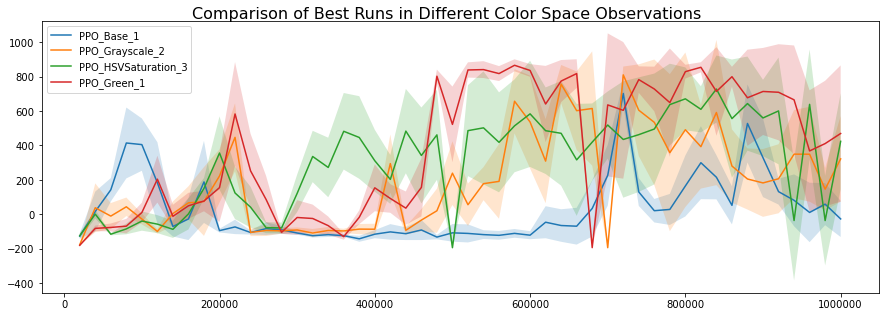

In [4]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(15)
fig.suptitle('Comparison of Best Runs in Different Color Space Observations', fontsize=16, y=0.92)
line1, = ax.plot(ppo_base_1['Step'], ppo_base_1['Value'])
line2, = ax.plot(ppo_grayscale_2['Step'], ppo_grayscale_2['Value'])
line3, = ax.plot(ppo_hsvsaturation_3['Step'], ppo_hsvsaturation_3['Value'])
line4, = ax.plot(ppo_green_1['Step'], ppo_green_1['Value'])
ax.fill_between(ppo_base_1['Step'], ppo_base_1['Value'] - ppo_base_1['Std'],  ppo_base_1['Value'] + ppo_base_1['Std'], alpha=0.2)
ax.fill_between(ppo_grayscale_2['Step'], ppo_grayscale_2['Value'] - ppo_grayscale_2['Std'],  ppo_grayscale_2['Value'] + ppo_grayscale_2['Std'], alpha=0.2)
ax.fill_between(ppo_hsvsaturation_3['Step'], ppo_hsvsaturation_3['Value'] - ppo_hsvsaturation_3['Std'],  ppo_hsvsaturation_3['Value'] + ppo_hsvsaturation_3['Std'], alpha=0.2)
ax.fill_between(ppo_green_1['Step'], ppo_green_1['Value'] - ppo_green_1['Std'],  ppo_green_1['Value'] + ppo_green_1['Std'], alpha=0.2)
ax.ticklabel_format(style='plain')
ax.legend([line1, line2, line3, line4], ['PPO_Base_1', 'PPO_Grayscale_2', 'PPO_HSVSaturation_3', 'PPO_Green_1'])
plt.show()

##### Best performing Models

In [5]:
ind = ppo_base_1['Value'].idxmax()
print("RGB Observation Best Performing Model")
print(ppo_base_1.iloc[[ind]])

ind = ppo_grayscale_2['Value'].idxmax()
print("Grayscale Observation Best Performing Model")
print(ppo_grayscale_2.iloc[[ind]])

ind = ppo_hsvsaturation_3['Value'].idxmax()
print("HSV Saturation Observation Best Performing Model")
print(ppo_hsvsaturation_3.iloc[[ind]])

ind = ppo_green_1['Value'].idxmax()
print("Green Channel Observation Best Performing Model")
print(ppo_green_1.iloc[[ind]])

RGB Observation Best Performing Model
      Step       Value        Std
35  720000  701.524788  67.335005
Grayscale Observation Best Performing Model
      Step      Value        Std
35  720000  809.43127  48.379331
HSV Saturation Observation Best Performing Model
      Step       Value        Std
41  840000  727.387285  194.48625
Green Channel Observation Best Performing Model
      Step       Value        Std
28  580000  865.124812  34.816177


##### Example Runs of Best Performing Models

In [ ]:
#Original RGB Observation
env = CarRacing()
env = Monitor(env)
ppo_path = os.path.join('Models', 'PPO_Base', "PPO_1", "PPO_Base_720000_steps")
model = PPO.load(ppo_path, env=env)
mean_reward, std = evaluate_policy(model, env, n_eval_episodes=5, render=True)
env.close()
print((mean_reward, std))

In [ ]:
#Grayscale Observation
env = carRacingGrayscale()
env = Monitor(env)
ppo_path = os.path.join('Models', 'PPO_Grayscale', "PPO_2", "PPO_Grayscale_720000_steps")
model = PPO.load(ppo_path, env=env)
mean_reward, std = evaluate_policy(model, env, n_eval_episodes=5, render=True)
env.close()
print((mean_reward, std))

In [ ]:
#HSV Saturation Channel Observation
env = carRacingHSVSaturation()
env = Monitor(env)
ppo_path = os.path.join('Models', 'PPO_HSVSaturation', "PPO_3", "PPO_HSVSaturation_840000_steps")
model = PPO.load(ppo_path, env=env)
mean_reward, std = evaluate_policy(model, env, n_eval_episodes=5, render=True)
env.close()
print((mean_reward, std))

In [ ]:
#RGB Green Channel Observation
env = carRacingGreen()
env = Monitor(env)
ppo_path = os.path.join('Models', 'PPO_Green', "PPO_1", "PPO_Green_580000_steps")
model = PPO.load(ppo_path, env=env)
mean_reward, std = evaluate_policy(model, env, n_eval_episodes=5, render=True)
env.close()
print((mean_reward, std))

### Framestacking Results

In [6]:
ppo_framestack_2_1 = pd.read_csv("Evaluation/PPO_Framestack_2/PPO_1/eval_rew_mean.csv")
ppo_framestack_2_1.drop(columns="Unnamed: 0", inplace=True)
ppo_framestack_2_2 = pd.read_csv("Evaluation/PPO_Framestack_2/PPO_2/eval_rew_mean.csv")
ppo_framestack_2_2.drop(columns="Unnamed: 0", inplace=True)
ppo_framestack_2_3 = pd.read_csv("Evaluation/PPO_Framestack_2/PPO_3/eval_rew_mean.csv")
ppo_framestack_2_3.drop(columns="Unnamed: 0", inplace=True)

ppo_framestack_3_1 = pd.read_csv("Evaluation/PPO_Framestack_3/PPO_1/eval_rew_mean.csv")
ppo_framestack_3_1.drop(columns="Unnamed: 0", inplace=True)
ppo_framestack_3_2 = pd.read_csv("Evaluation/PPO_Framestack_3/PPO_2/eval_rew_mean.csv")
ppo_framestack_3_2.drop(columns="Unnamed: 0", inplace=True)
ppo_framestack_3_3 = pd.read_csv("Evaluation/PPO_Framestack_3/PPO_3/eval_rew_mean.csv")
ppo_framestack_3_3.drop(columns="Unnamed: 0", inplace=True)

ppo_framestack_4_1 = pd.read_csv("Evaluation/PPO_Framestack_4/PPO_1/eval_rew_mean.csv")
ppo_framestack_4_1.drop(columns="Unnamed: 0", inplace=True)
ppo_framestack_4_2 = pd.read_csv("Evaluation/PPO_Framestack_4/PPO_2/eval_rew_mean.csv")
ppo_framestack_4_2.drop(columns="Unnamed: 0", inplace=True)
ppo_framestack_4_3 = pd.read_csv("Evaluation/PPO_Framestack_4/PPO_3/eval_rew_mean.csv")
ppo_framestack_4_3.drop(columns="Unnamed: 0", inplace=True)

ppo_framestack_5_1 = pd.read_csv("Evaluation/PPO_Framestack_5/PPO_1/eval_rew_mean.csv")
ppo_framestack_5_1.drop(columns="Unnamed: 0", inplace=True)
ppo_framestack_5_2 = pd.read_csv("Evaluation/PPO_Framestack_5/PPO_2/eval_rew_mean.csv")
ppo_framestack_5_2.drop(columns="Unnamed: 0", inplace=True)
ppo_framestack_5_3 = pd.read_csv("Evaluation/PPO_Framestack_5/PPO_3/eval_rew_mean.csv")
ppo_framestack_5_3.drop(columns="Unnamed: 0", inplace=True)

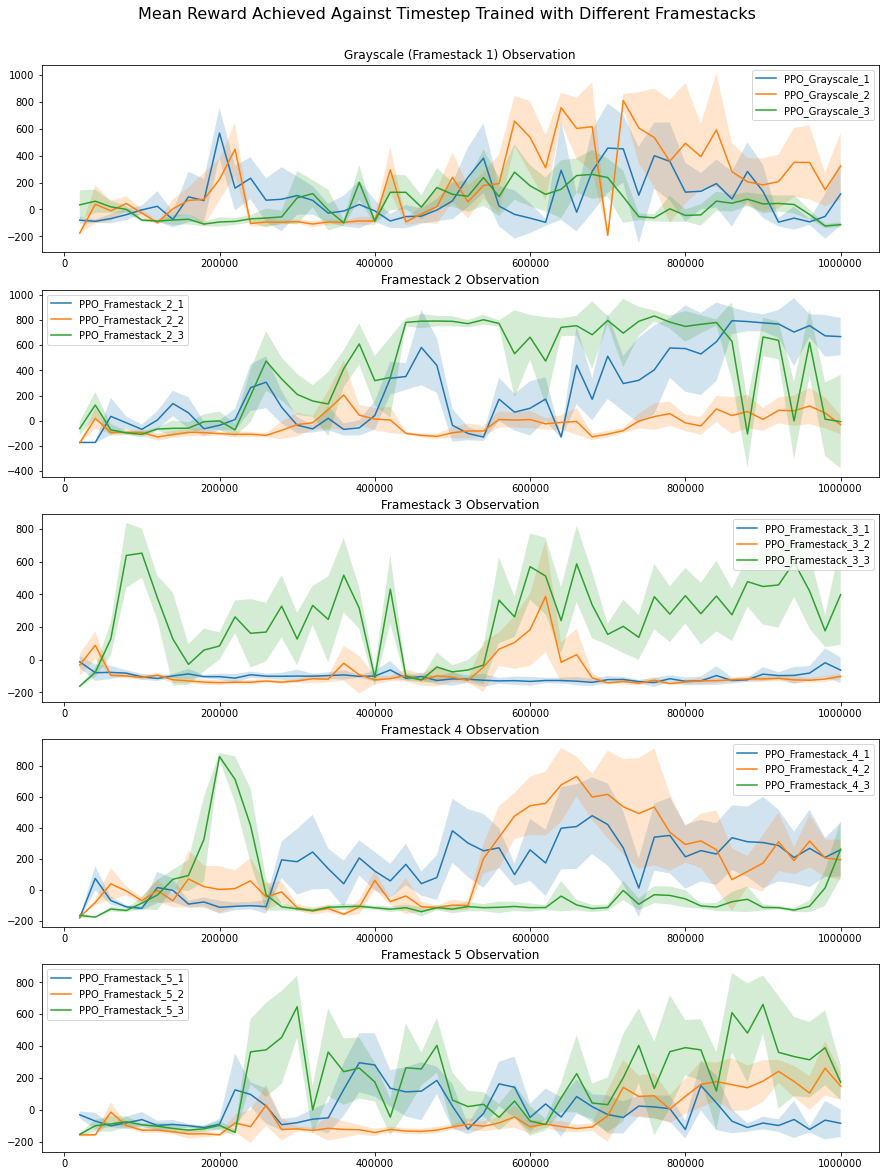

In [7]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1)
fig.set_figheight(20)
fig.set_figwidth(15)
fig.suptitle('Mean Reward Achieved Against Timestep Trained with Different Framestacks', fontsize=16, y=0.92)

line1, = ax1.plot(ppo_grayscale_1['Step'], ppo_grayscale_1['Value'])
line2, = ax1.plot(ppo_grayscale_2['Step'], ppo_grayscale_2['Value'])
line3, = ax1.plot(ppo_grayscale_3['Step'], ppo_grayscale_3['Value'])
ax1.fill_between(ppo_grayscale_1['Step'], ppo_grayscale_1['Value'] - ppo_grayscale_1['Std'],  ppo_grayscale_1['Value'] + ppo_grayscale_1['Std'], alpha=0.2)
ax1.fill_between(ppo_grayscale_2['Step'], ppo_grayscale_2['Value'] - ppo_grayscale_2['Std'],  ppo_grayscale_2['Value'] + ppo_grayscale_2['Std'], alpha=0.2)
ax1.fill_between(ppo_grayscale_3['Step'], ppo_grayscale_3['Value'] - ppo_grayscale_3['Std'],  ppo_grayscale_3['Value'] + ppo_grayscale_3['Std'], alpha=0.2)
ax1.ticklabel_format(style='plain')
ax1.legend([line1, line2, line3], ['PPO_Grayscale_1', 'PPO_Grayscale_2', 'PPO_Grayscale_3'])
ax1.title.set_text("Grayscale (Framestack 1) Observation")

line1, = ax2.plot(ppo_framestack_2_1['Step'], ppo_framestack_2_1['Value'])
line2, = ax2.plot(ppo_framestack_2_2['Step'], ppo_framestack_2_2['Value'])
line3, = ax2.plot(ppo_framestack_2_3['Step'], ppo_framestack_2_3['Value'])
ax2.fill_between(ppo_framestack_2_1['Step'], ppo_framestack_2_1['Value'] - ppo_framestack_2_1['Std'],  ppo_framestack_2_1['Value'] + ppo_framestack_2_1['Std'], alpha=0.2)
ax2.fill_between(ppo_framestack_2_2['Step'], ppo_framestack_2_2['Value'] - ppo_framestack_2_2['Std'],  ppo_framestack_2_2['Value'] + ppo_framestack_2_2['Std'], alpha=0.2)
ax2.fill_between(ppo_framestack_2_3['Step'], ppo_framestack_2_3['Value'] - ppo_framestack_2_3['Std'],  ppo_framestack_2_3['Value'] + ppo_framestack_2_3['Std'], alpha=0.2)
ax2.ticklabel_format(style='plain')
ax2.legend([line1, line2, line3], ['PPO_Framestack_2_1', 'PPO_Framestack_2_2', 'PPO_Framestack_2_3'])
ax2.title.set_text("Framestack 2 Observation")

line1, = ax3.plot(ppo_framestack_3_1['Step'], ppo_framestack_3_1['Value'])
line2, = ax3.plot(ppo_framestack_3_2['Step'], ppo_framestack_3_2['Value'])
line3, = ax3.plot(ppo_framestack_3_3['Step'], ppo_framestack_3_3['Value'])
ax3.fill_between(ppo_framestack_3_1['Step'], ppo_framestack_3_1['Value'] - ppo_framestack_3_1['Std'],  ppo_framestack_3_1['Value'] + ppo_framestack_3_1['Std'], alpha=0.2)
ax3.fill_between(ppo_framestack_3_2['Step'], ppo_framestack_3_2['Value'] - ppo_framestack_3_2['Std'],  ppo_framestack_3_2['Value'] + ppo_framestack_3_2['Std'], alpha=0.2)
ax3.fill_between(ppo_framestack_3_3['Step'], ppo_framestack_3_3['Value'] - ppo_framestack_3_3['Std'],  ppo_framestack_3_3['Value'] + ppo_framestack_3_3['Std'], alpha=0.2)
ax3.ticklabel_format(style='plain')
ax3.legend([line1, line2, line3], ['PPO_Framestack_3_1', 'PPO_Framestack_3_2', 'PPO_Framestack_3_3'])
ax3.title.set_text("Framestack 3 Observation")

line1, = ax4.plot(ppo_framestack_4_1['Step'], ppo_framestack_4_1['Value'])
line2, = ax4.plot(ppo_framestack_4_2['Step'], ppo_framestack_4_2['Value'])
line3, = ax4.plot(ppo_framestack_4_3['Step'], ppo_framestack_4_3['Value'])
ax4.fill_between(ppo_framestack_4_1['Step'], ppo_framestack_4_1['Value'] - ppo_framestack_4_1['Std'],  ppo_framestack_4_1['Value'] + ppo_framestack_4_1['Std'], alpha=0.2)
ax4.fill_between(ppo_framestack_4_2['Step'], ppo_framestack_4_2['Value'] - ppo_framestack_4_2['Std'],  ppo_framestack_4_2['Value'] + ppo_framestack_4_2['Std'], alpha=0.2)
ax4.fill_between(ppo_framestack_4_3['Step'], ppo_framestack_4_3['Value'] - ppo_framestack_4_3['Std'],  ppo_framestack_4_3['Value'] + ppo_framestack_4_3['Std'], alpha=0.2)
ax4.ticklabel_format(style='plain')
ax4.legend([line1, line2, line3], ['PPO_Framestack_4_1', 'PPO_Framestack_4_2', 'PPO_Framestack_4_3'])
ax4.title.set_text("Framestack 4 Observation")

line1, = ax5.plot(ppo_framestack_5_1['Step'], ppo_framestack_5_1['Value'])
line2, = ax5.plot(ppo_framestack_5_2['Step'], ppo_framestack_5_2['Value'])
line3, = ax5.plot(ppo_framestack_5_3['Step'], ppo_framestack_5_3['Value'])
ax5.fill_between(ppo_framestack_5_1['Step'], ppo_framestack_5_1['Value'] - ppo_framestack_5_1['Std'],  ppo_framestack_5_1['Value'] + ppo_framestack_5_1['Std'], alpha=0.2)
ax5.fill_between(ppo_framestack_5_2['Step'], ppo_framestack_5_2['Value'] - ppo_framestack_5_2['Std'],  ppo_framestack_5_2['Value'] + ppo_framestack_5_2['Std'], alpha=0.2)
ax5.fill_between(ppo_framestack_5_3['Step'], ppo_framestack_5_3['Value'] - ppo_framestack_5_3['Std'],  ppo_framestack_5_3['Value'] + ppo_framestack_5_3['Std'], alpha=0.2)
ax5.ticklabel_format(style='plain')
ax5.legend([line1, line2, line3], ['PPO_Framestack_5_1', 'PPO_Framestack_5_2', 'PPO_Framestack_5_3'])
ax5.title.set_text("Framestack 5 Observation")

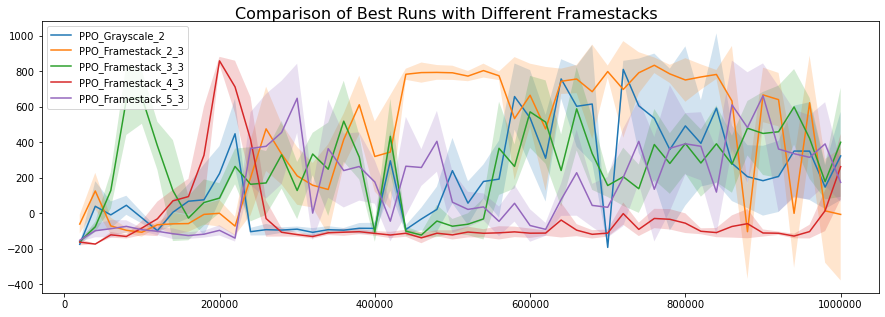

In [8]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(15)
fig.suptitle('Comparison of Best Runs with Different Framestacks', fontsize=16, y=0.92)
line1, = ax.plot(ppo_grayscale_2['Step'], ppo_grayscale_2['Value'])
line2, = ax.plot(ppo_framestack_2_3['Step'], ppo_framestack_2_3['Value'])
line3, = ax.plot(ppo_framestack_3_3['Step'], ppo_framestack_3_3['Value'])
line4, = ax.plot(ppo_framestack_4_3['Step'], ppo_framestack_4_3['Value'])
line5, = ax.plot(ppo_framestack_5_3['Step'], ppo_framestack_5_3['Value'])
ax.fill_between(ppo_grayscale_2['Step'], ppo_grayscale_2['Value'] - ppo_grayscale_2['Std'],  ppo_grayscale_2['Value'] + ppo_grayscale_2['Std'], alpha=0.2)
ax.fill_between(ppo_framestack_2_3['Step'], ppo_framestack_2_3['Value'] - ppo_framestack_2_3['Std'],  ppo_framestack_2_3['Value'] + ppo_framestack_2_3['Std'], alpha=0.2)
ax.fill_between(ppo_framestack_3_3['Step'], ppo_framestack_3_3['Value'] - ppo_framestack_3_3['Std'],  ppo_framestack_3_3['Value'] + ppo_framestack_3_3['Std'], alpha=0.2)
ax.fill_between(ppo_framestack_4_3['Step'], ppo_framestack_4_3['Value'] - ppo_framestack_4_3['Std'],  ppo_framestack_4_3['Value'] + ppo_framestack_4_3['Std'], alpha=0.2)
ax.fill_between(ppo_framestack_5_3['Step'], ppo_framestack_5_3['Value'] - ppo_framestack_5_3['Std'],  ppo_framestack_5_3['Value'] + ppo_framestack_5_3['Std'], alpha=0.2)
ax.ticklabel_format(style='plain')
ax.legend([line1, line2, line3, line4, line5], ['PPO_Grayscale_2', 'PPO_Framestack_2_3', 'PPO_Framestack_3_3', 'PPO_Framestack_4_3', 'PPO_Framestack_5_3'])
plt.show()

##### Best Performing Models

In [9]:
ind = ppo_grayscale_2['Value'].idxmax()
print("Grayscale (Framestack 1) Observation Best Performing Model")
print(ppo_grayscale_2.iloc[[ind]])

ind = ppo_framestack_2_3['Value'].idxmax()
print("Framestack 2 Observation Best Performing Model")
print(ppo_framestack_2_3.iloc[[ind]])

ind = ppo_framestack_3_3['Value'].idxmax()
print("Framestack 3 Observation Best Performing Model")
print(ppo_framestack_3_3.iloc[[ind]])

ind = ppo_framestack_4_3['Value'].idxmax()
print("Framestack 4 Observation Best Performing Model")
print(ppo_framestack_4_3.iloc[[ind]])

ind = ppo_framestack_5_3['Value'].idxmax()
print("Framestack 5 Observation Best Performing Model")
print(ppo_framestack_5_3.iloc[[ind]])

Grayscale (Framestack 1) Observation Best Performing Model
      Step      Value        Std
35  720000  809.43127  48.379331
Framestack 2 Observation Best Performing Model
      Step       Value        Std
37  760000  832.708034  44.007981
Framestack 3 Observation Best Performing Model
     Step       Value         Std
4  100000  652.952858  149.785364
Framestack 4 Observation Best Performing Model
     Step   Value        Std
9  200000  857.54  22.779649
Framestack 5 Observation Best Performing Model
      Step       Value         Std
44  900000  661.281518  181.929683


##### Example Runs of Best Performing Models

In [ ]:
#Framestack 2
env = carRacingFramestack(2)
env = Monitor(env)
ppo_path = os.path.join('Models', 'PPO_Framestack_2', "PPO_3", "PPO_Framestack_2_760000_steps")
model = PPO.load(ppo_path, env=env)
mean_reward, std = evaluate_policy(model, env, n_eval_episodes=5, render=True)
env.close()
print((mean_reward, std))

In [ ]:
#Framestack 3
env = carRacingFramestack(3)
env = Monitor(env)
ppo_path = os.path.join('Models', 'PPO_Framestack_3', "PPO_3", "PPO_Framestack_3_100000_steps")
model = PPO.load(ppo_path, env=env)
mean_reward, std = evaluate_policy(model, env, n_eval_episodes=5, render=True)
env.close()
print((mean_reward, std))

In [ ]:
#Framestack 4
env = carRacingFramestack(4)
env = Monitor(env)
ppo_path = os.path.join('Models', 'PPO_Framestack_4', "PPO_3", "PPO_Framestack_4_200000_steps")
model = PPO.load(ppo_path, env=env)
mean_reward, std = evaluate_policy(model, env, n_eval_episodes=5, render=True)
env.close()
print((mean_reward, std))

In [ ]:
#Framestack 5
env = carRacingFramestack(5)
env = Monitor(env)
ppo_path = os.path.join('Models', 'PPO_Framestack_5', "PPO_3", "PPO_Framestack_5_900000_steps")
model = PPO.load(ppo_path, env=env)
mean_reward, std = evaluate_policy(model, env, n_eval_episodes=5, render=True)
env.close()
print((mean_reward, std))

### Downsampling Results 

In [10]:
ppo_resized_88_1 = pd.read_csv("Evaluation/PPO_resized_88/PPO_1/eval_rew_mean.csv")
ppo_resized_88_1.drop(columns="Unnamed: 0", inplace=True)
ppo_resized_88_2 = pd.read_csv("Evaluation/PPO_resized_88/PPO_2/eval_rew_mean.csv")
ppo_resized_88_2.drop(columns="Unnamed: 0", inplace=True)
ppo_resized_88_3 = pd.read_csv("Evaluation/PPO_resized_88/PPO_3/eval_rew_mean.csv")
ppo_resized_88_3.drop(columns="Unnamed: 0", inplace=True)

ppo_resized_80_1 = pd.read_csv("Evaluation/PPO_resized_80/PPO_1/eval_rew_mean.csv")
ppo_resized_80_1.drop(columns="Unnamed: 0", inplace=True)
ppo_resized_80_2 = pd.read_csv("Evaluation/PPO_resized_80/PPO_2/eval_rew_mean.csv")
ppo_resized_80_2.drop(columns="Unnamed: 0", inplace=True)
ppo_resized_80_3 = pd.read_csv("Evaluation/PPO_resized_80/PPO_3/eval_rew_mean.csv")
ppo_resized_80_3.drop(columns="Unnamed: 0", inplace=True)

ppo_resized_72_1 = pd.read_csv("Evaluation/PPO_resized_72/PPO_1/eval_rew_mean.csv")
ppo_resized_72_1.drop(columns="Unnamed: 0", inplace=True)
ppo_resized_72_2 = pd.read_csv("Evaluation/PPO_resized_72/PPO_2/eval_rew_mean.csv")
ppo_resized_72_2.drop(columns="Unnamed: 0", inplace=True)
ppo_resized_72_3 = pd.read_csv("Evaluation/PPO_resized_72/PPO_3/eval_rew_mean.csv")
ppo_resized_72_3.drop(columns="Unnamed: 0", inplace=True)

ppo_resized_64_1 = pd.read_csv("Evaluation/PPO_resized_64/PPO_1/eval_rew_mean.csv")
ppo_resized_64_1.drop(columns="Unnamed: 0", inplace=True)
ppo_resized_64_2 = pd.read_csv("Evaluation/PPO_resized_64/PPO_2/eval_rew_mean.csv")
ppo_resized_64_2.drop(columns="Unnamed: 0", inplace=True)
ppo_resized_64_3 = pd.read_csv("Evaluation/PPO_resized_64/PPO_3/eval_rew_mean.csv")
ppo_resized_64_3.drop(columns="Unnamed: 0", inplace=True)

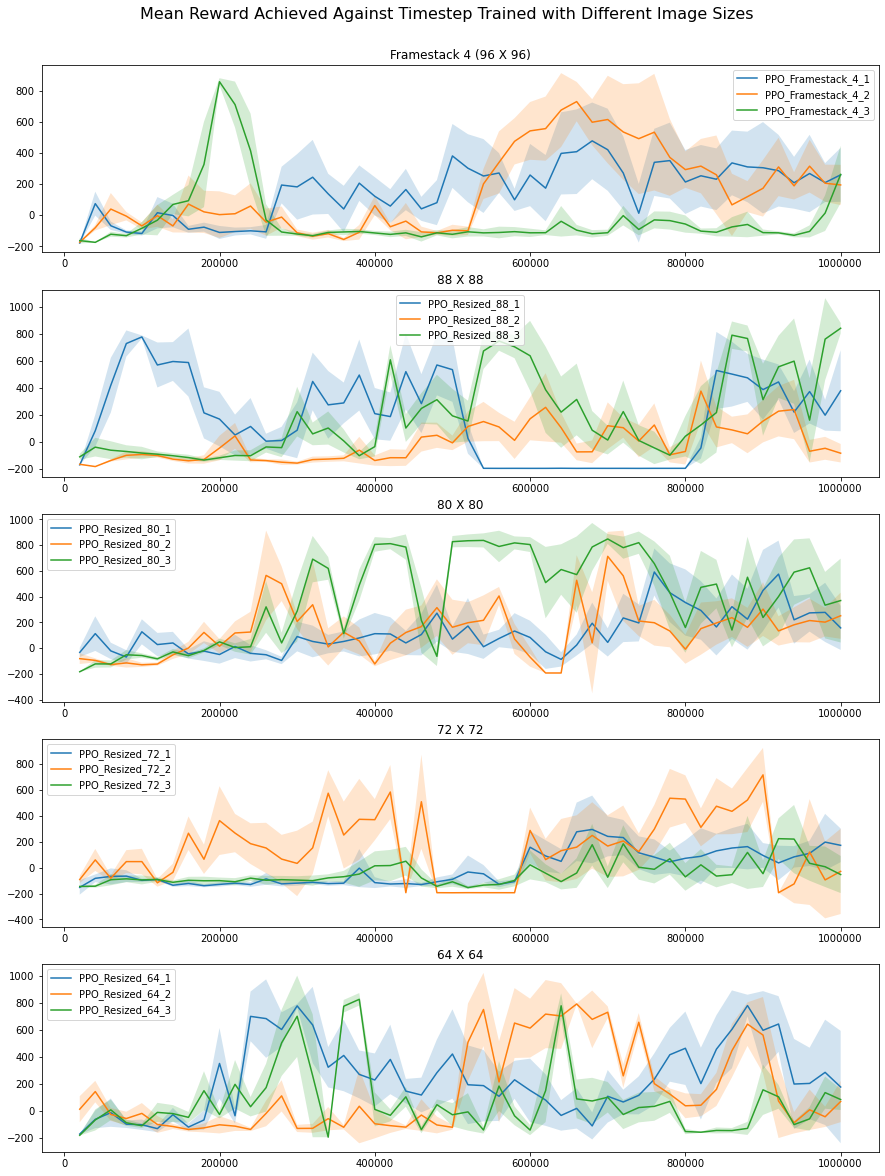

In [11]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1)
fig.set_figheight(20)
fig.set_figwidth(15)
fig.suptitle('Mean Reward Achieved Against Timestep Trained with Different Image Sizes', fontsize=16, y=0.92)

line1, = ax1.plot(ppo_framestack_4_1['Step'], ppo_framestack_4_1['Value'])
line2, = ax1.plot(ppo_framestack_4_2['Step'], ppo_framestack_4_2['Value'])
line3, = ax1.plot(ppo_framestack_4_3['Step'], ppo_framestack_4_3['Value'])
ax1.fill_between(ppo_framestack_4_1['Step'], ppo_framestack_4_1['Value'] - ppo_framestack_4_1['Std'],  ppo_framestack_4_1['Value'] + ppo_framestack_4_1['Std'], alpha=0.2)
ax1.fill_between(ppo_framestack_4_2['Step'], ppo_framestack_4_2['Value'] - ppo_framestack_4_2['Std'],  ppo_framestack_4_2['Value'] + ppo_framestack_4_2['Std'], alpha=0.2)
ax1.fill_between(ppo_framestack_4_3['Step'], ppo_framestack_4_3['Value'] - ppo_framestack_4_3['Std'],  ppo_framestack_4_3['Value'] + ppo_framestack_4_3['Std'], alpha=0.2)
ax1.ticklabel_format(style='plain')
ax1.legend([line1, line2, line3], ['PPO_Framestack_4_1', 'PPO_Framestack_4_2', 'PPO_Framestack_4_3'])
ax1.title.set_text("Framestack 4 (96 X 96)")

line1, = ax2.plot(ppo_resized_88_1['Step'], ppo_resized_88_1['Value'])
line2, = ax2.plot(ppo_resized_88_2['Step'], ppo_resized_88_2['Value'])
line3, = ax2.plot(ppo_resized_88_3['Step'], ppo_resized_88_3['Value'])
ax2.fill_between(ppo_resized_88_1['Step'], ppo_resized_88_1['Value'] - ppo_resized_88_1['Std'],  ppo_resized_88_1['Value'] + ppo_resized_88_1['Std'], alpha=0.2)
ax2.fill_between(ppo_resized_88_2['Step'], ppo_resized_88_2['Value'] - ppo_resized_88_2['Std'],  ppo_resized_88_2['Value'] + ppo_resized_88_2['Std'], alpha=0.2)
ax2.fill_between(ppo_resized_88_3['Step'], ppo_resized_88_3['Value'] - ppo_resized_88_3['Std'],  ppo_resized_88_3['Value'] + ppo_resized_88_3['Std'], alpha=0.2)
ax2.ticklabel_format(style='plain')
ax2.legend([line1, line2, line3], ['PPO_Resized_88_1', 'PPO_Resized_88_2', 'PPO_Resized_88_3'])
ax2.title.set_text("88 X 88")

line1, = ax3.plot(ppo_resized_80_1['Step'], ppo_resized_80_1['Value'])
line2, = ax3.plot(ppo_resized_80_2['Step'], ppo_resized_80_2['Value'])
line3, = ax3.plot(ppo_resized_80_3['Step'], ppo_resized_80_3['Value'])
ax3.fill_between(ppo_resized_80_1['Step'], ppo_resized_80_1['Value'] - ppo_resized_80_1['Std'],  ppo_resized_80_1['Value'] + ppo_resized_80_1['Std'], alpha=0.2)
ax3.fill_between(ppo_resized_80_2['Step'], ppo_resized_80_2['Value'] - ppo_resized_80_2['Std'],  ppo_resized_80_2['Value'] + ppo_resized_80_2['Std'], alpha=0.2)
ax3.fill_between(ppo_resized_80_3['Step'], ppo_resized_80_3['Value'] - ppo_resized_80_3['Std'],  ppo_resized_80_3['Value'] + ppo_resized_80_3['Std'], alpha=0.2)
ax3.ticklabel_format(style='plain')
ax3.legend([line1, line2, line3], ['PPO_Resized_80_1', 'PPO_Resized_80_2', 'PPO_Resized_80_3'])
ax3.title.set_text("80 X 80")

line1, = ax4.plot(ppo_resized_72_1['Step'], ppo_resized_72_1['Value'])
line2, = ax4.plot(ppo_resized_72_2['Step'], ppo_resized_72_2['Value'])
line3, = ax4.plot(ppo_resized_72_3['Step'], ppo_resized_72_3['Value'])
ax4.fill_between(ppo_resized_72_1['Step'], ppo_resized_72_1['Value'] - ppo_resized_72_1['Std'],  ppo_resized_72_1['Value'] + ppo_resized_72_1['Std'], alpha=0.2)
ax4.fill_between(ppo_resized_72_2['Step'], ppo_resized_72_2['Value'] - ppo_resized_72_2['Std'],  ppo_resized_72_2['Value'] + ppo_resized_72_2['Std'], alpha=0.2)
ax4.fill_between(ppo_resized_72_3['Step'], ppo_resized_72_3['Value'] - ppo_resized_72_3['Std'],  ppo_resized_72_3['Value'] + ppo_resized_72_3['Std'], alpha=0.2)
ax4.ticklabel_format(style='plain')
ax4.legend([line1, line2, line3], ['PPO_Resized_72_1', 'PPO_Resized_72_2', 'PPO_Resized_72_3'])
ax4.title.set_text("72 X 72")

line1, = ax5.plot(ppo_resized_64_1['Step'], ppo_resized_64_1['Value'])
line2, = ax5.plot(ppo_resized_64_2['Step'], ppo_resized_64_2['Value'])
line3, = ax5.plot(ppo_resized_64_3['Step'], ppo_resized_64_3['Value'])
ax5.fill_between(ppo_resized_64_1['Step'], ppo_resized_64_1['Value'] - ppo_resized_64_1['Std'],  ppo_resized_64_1['Value'] + ppo_resized_64_1['Std'], alpha=0.2)
ax5.fill_between(ppo_resized_64_2['Step'], ppo_resized_64_2['Value'] - ppo_resized_64_2['Std'],  ppo_resized_64_2['Value'] + ppo_resized_64_2['Std'], alpha=0.2)
ax5.fill_between(ppo_resized_64_3['Step'], ppo_resized_64_3['Value'] - ppo_resized_64_3['Std'],  ppo_resized_64_3['Value'] + ppo_resized_64_3['Std'], alpha=0.2)
ax5.ticklabel_format(style='plain')
ax5.legend([line1, line2, line3], ['PPO_Resized_64_1', 'PPO_Resized_64_2', 'PPO_Resized_64_3'])
ax5.title.set_text("64 X 64")

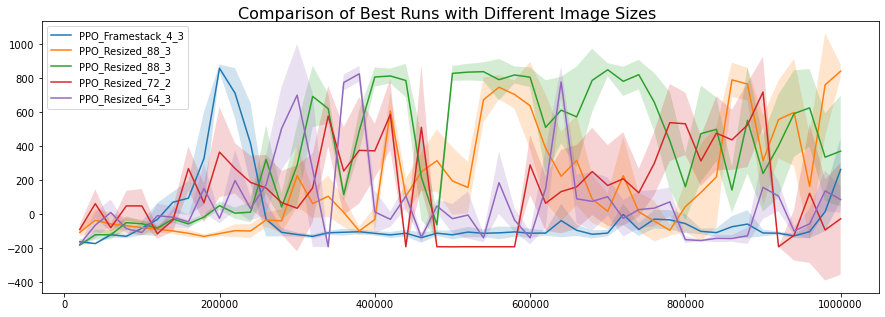

In [12]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(15)
fig.suptitle('Comparison of Best Runs with Different Image Sizes', fontsize=16, y=0.92)
line1, = ax.plot(ppo_framestack_4_3['Step'], ppo_framestack_4_3['Value'])
line2, = ax.plot(ppo_resized_88_3['Step'], ppo_resized_88_3['Value'])
line3, = ax.plot(ppo_resized_80_3['Step'], ppo_resized_80_3['Value'])
line4, = ax.plot(ppo_resized_72_2['Step'], ppo_resized_72_2['Value'])
line5, = ax.plot(ppo_resized_64_3['Step'], ppo_resized_64_3['Value'])
ax.fill_between(ppo_framestack_4_3['Step'], ppo_framestack_4_3['Value'] - ppo_framestack_4_3['Std'],  ppo_framestack_4_3['Value'] + ppo_framestack_4_3['Std'], alpha=0.2)
ax.fill_between(ppo_resized_88_3['Step'], ppo_resized_88_3['Value'] - ppo_resized_88_3['Std'],  ppo_resized_88_3['Value'] + ppo_resized_88_3['Std'], alpha=0.2)
ax.fill_between(ppo_resized_80_3['Step'], ppo_resized_80_3['Value'] - ppo_resized_80_3['Std'],  ppo_resized_80_3['Value'] + ppo_resized_80_3['Std'], alpha=0.2)
ax.fill_between(ppo_resized_72_2['Step'], ppo_resized_72_2['Value'] - ppo_resized_72_2['Std'],  ppo_resized_72_2['Value'] + ppo_resized_72_2['Std'], alpha=0.2)
ax.fill_between(ppo_resized_64_3['Step'], ppo_resized_64_3['Value'] - ppo_resized_64_3['Std'],  ppo_resized_64_3['Value'] + ppo_resized_64_3['Std'], alpha=0.2)
ax.ticklabel_format(style='plain')
ax.legend([line1, line2, line3, line4, line5], ['PPO_Framestack_4_3', 'PPO_Resized_88_3', 'PPO_Resized_88_3', 'PPO_Resized_72_2', 'PPO_Resized_64_3'])
plt.show()

##### Best Performing Models

In [13]:
ind = ppo_framestack_4_3['Value'].idxmax()
print("Framestack 4 (96 x 96) Observation Best Performing Model")
print(ppo_framestack_4_3.iloc[[ind]])

ind = ppo_resized_88_3['Value'].idxmax()
print("88 x 88 Observation Best Performing Model")
print(ppo_resized_88_3.iloc[[ind]])

ind = ppo_resized_80_3['Value'].idxmax()
print("80 x 80 Observation Best Performing Model")
print(ppo_resized_80_3.iloc[[ind]])

ind = ppo_resized_72_2['Value'].idxmax()
print("72 x 72 Observation Best Performing Model")
print(ppo_resized_72_2.iloc[[ind]])

ind = ppo_resized_64_3['Value'].idxmax()
print("64 x 64 Observation Best Performing Model")
print(ppo_resized_64_3.iloc[[ind]])

Framestack 4 (96 x 96) Observation Best Performing Model
     Step   Value        Std
9  200000  857.54  22.779649
88 x 88 Observation Best Performing Model
       Step       Value        Std
49  1000000  840.176699  39.525417
80 x 80 Observation Best Performing Model
      Step       Value       Std
34  700000  848.524545  38.34306
72 x 72 Observation Best Performing Model
      Step       Value        Std
44  900000  717.847107  208.14723
64 x 64 Observation Best Performing Model
      Step      Value        Std
18  380000  824.70744  46.127032


##### Example Runs of Best Performing Models

In [ ]:
#88 x 88
env = carRacingResized(88)
env = Monitor(env)
ppo_path = os.path.join('Models', 'PPO_Resized_88', "PPO_3", "PPO_Resized_88_1000000_steps")
model = PPO.load(ppo_path, env=env)
mean_reward, std = evaluate_policy(model, env, n_eval_episodes=5, render=True)
env.close()
print((mean_reward, std))

In [ ]:
#80 x 80
env = carRacingResized(80)
env = Monitor(env)
ppo_path = os.path.join('Models', 'PPO_Resized_80', "PPO_3", "PPO_Resized_80_700000_steps")
model = PPO.load(ppo_path, env=env)
mean_reward, std = evaluate_policy(model, env, n_eval_episodes=5, render=True)
env.close()
print((mean_reward, std))

In [ ]:
#72 x 72
env = carRacingResized(72)
env = Monitor(env)
ppo_path = os.path.join('Models', 'PPO_Resized_72', "PPO_2", "PPO_Resized_72_900000_steps")
model = PPO.load(ppo_path, env=env)
mean_reward, std = evaluate_policy(model, env, n_eval_episodes=5, render=True)
env.close()
print((mean_reward, std))

In [ ]:
#64 x 64
env = carRacingResized(64)
env = Monitor(env)
ppo_path = os.path.join('Models', 'PPO_Resized_64', "PPO_3", "PPO_Resized_64_380000_steps")
model = PPO.load(ppo_path, env=env)
mean_reward, std = evaluate_policy(model, env, n_eval_episodes=5, render=True)
env.close()
print((mean_reward, std))